In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/Projects/spotify_analysis/'

In [ ]:
!pip install plotnine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
!pip install heatmapz
from heatmap import heatmap, corrplot

In [ ]:
#load data

streamdf = pd.read_csv(data_path+'Spotify_Streaming_Analysis.csv')
libdf = pd.read_csv(data_path+'spotify_saved_songs.csv')

In [ ]:
streamdf.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,Artist,Track,TrackId,msPlayed
0,0.472,0.0928,82.059,0.0337,0.721000,0.958000,4,0.768,2,108293,-10.100,0.827,1,$plashious,All That's Left Is Memories,4wy4JV7dJTE1Xu0P1FIRow,12710.0
1,0.926,0.0821,172.638,0.0479,0.031000,0.001200,4,0.610,8,200400,-4.843,0.861,0,*NSYNC,Bye Bye Bye,62bOmKYxYg7dhrC6gH9vFn,4537.0
2,0.939,0.4770,112.041,0.0466,0.052100,0.000560,4,0.751,8,200440,-3.305,0.905,0,*NSYNC,I Want You Back - Radio Edit,221LRlPHPuevgE1tuUlof9,90119.0
3,0.550,0.1100,155.767,0.0949,0.189000,0.000728,4,0.541,5,209579,-8.051,0.253,0,11:11,All Year,5LbXnDbn75IQSm5FCTANHd,209578.0
4,0.863,0.3390,93.977,0.0626,0.000651,0.000000,3,0.200,5,184427,-3.424,0.468,1,12 Stones,Anthem For The Underdog,6FFwt1ea9hJ4MfMQLywahm,11295.0


In [ ]:
libdf.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,Track,Artist,ArtistID,TrackID,msPlayed
0,0.00371,0.1050,136.908,0.0497,0.993000,0.953000,3,0.358,10,211584,-29.259,0.112,1,Allisone,Steven Windhaug,49PC2thu4PsvOGs77fgXwA,43CBnlr309XH9gyu8cIHSl,211583
1,0.71500,0.0942,155.925,0.0362,0.001250,0.000008,3,0.315,11,289533,-8.072,0.497,0,Iris,The Goo Goo Dolls,2sil8z5kiy4r76CRTXxBCA,6Qyc6fS4DsZjB2mRW9DsQs,2396024
2,0.70400,0.0933,118.242,0.0804,0.000155,0.002210,4,0.430,1,315120,-8.008,0.703,0,Walk,Pantera,14pVkFUHDL207LzLHtSA18,7fcfNW0XxTWlwVlftzfDOR,306788
3,0.93400,0.0969,125.052,0.0636,0.000055,0.097900,4,0.253,7,476427,-5.769,0.259,1,Jaguar God,Mastodon,1Dvfqq39HxvCJ3GvfeIFuT,7lGOFEVWK0jzpLMFuR4ANh,1682173
4,0.89100,0.0657,139.903,0.0587,0.000805,0.092800,4,0.610,4,246733,-5.452,0.510,0,Symphony Of Destruction,Megadeth,1Yox196W7bzVNZI7RBaPnf,51TG9W3y9qyO8BY5RXKgnZ,454428


In [ ]:
streamdf.shape

(5701, 17)

In [ ]:
libdf.shape

(514, 18)

In [ ]:
streamdf.drop(streamdf[streamdf['msPlayed']==0.0].index,inplace=True)

In [ ]:
libdf = libdf.sort_values('msPlayed').drop_duplicates(subset=['Track', 'Artist'], keep='last')

In [ ]:
# Top artists streamed by user

top_artists = streamdf['Artist'].value_counts().sort_values(ascending=False)
top_artists.head()

Hans Zimmer    120
Green Day       82
The 1975        71
Eminem          66
Avicii          35
Name: Artist, dtype: int64

In [ ]:
# Top artists saved by user

top_artists_saved = libdf['Artist'].value_counts().sort_values(ascending=False)
top_artists_saved.head()

The 1975         37
Billie Eilish    18
Ramin Djawadi    15
Linkin Park       9
Green Day         7
Name: Artist, dtype: int64

In [ ]:
# Top songs streamed by user
top_songs = streamdf[['Track','Artist','msPlayed','duration_ms']].sort_values(by='msPlayed', ascending=False)
top_songs.dropna(inplace=True)
top_songs['Played'] = (top_songs['msPlayed']/top_songs['duration_ms']).astype(int)
top_songs.sort_values(by='Played', ascending=False, inplace=True)
top_songs.head()

,Track,Artist,msPlayed,duration_ms,Played
3359,Billie Jean,Michael Jackson,20995821.0,90375,232
3617,Smells Like Teen Spirit - Live At The Paramoun...,Nirvana,7382997.0,35240,209
2653,Silhouette,KANA-BOON,10439828.0,57040,183
5586,Saturday Sun,Vance Joy,32469573.0,210111,154
1432,Australia,Emilio Lanza,4434623.0,34600,128


In [ ]:
# Top songs saved by user

top_songs_saved = libdf[['Track','Artist','msPlayed','duration_ms']].sort_values(by='msPlayed', ascending=False)
top_songs_saved['Played'] = (top_songs_saved['msPlayed']/top_songs_saved['duration_ms']).astype(int)
top_songs_saved.sort_values(by='Played', ascending=False, inplace=True)
top_songs_saved.head()

,Track,Artist,msPlayed,duration_ms,Played
261,Saturday Sun,Vance Joy,32469573,214720,151
192,The Cave,Mumford & Sons,16720631,215627,77
129,Good Riddance (Time of Your Life),Green Day,11074367,153467,72
196,Billie Jean,Michael Jackson,20995821,293827,71
205,Mystery of Love,Sufjan Stevens,17337626,248960,69


In [ ]:
# Time spent listening to songs

time_spent = streamdf['msPlayed'].sum()
minutes=time_spent/(1000*60)
hours=minutes/60
days = hours/24
print ("%d minutes, %d hours, %d days" % (minutes, hours, days))

34836 minutes, 580 hours, 24 days


In [ ]:
topaf = streamdf.copy()
topaf.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,Artist,Track,TrackId,msPlayed
0,0.472,0.0928,82.059,0.0337,0.721000,0.958000,4,0.768,2,108293,-10.100,0.827,1,$plashious,All That's Left Is Memories,4wy4JV7dJTE1Xu0P1FIRow,12710.0
1,0.926,0.0821,172.638,0.0479,0.031000,0.001200,4,0.610,8,200400,-4.843,0.861,0,*NSYNC,Bye Bye Bye,62bOmKYxYg7dhrC6gH9vFn,4537.0
2,0.939,0.4770,112.041,0.0466,0.052100,0.000560,4,0.751,8,200440,-3.305,0.905,0,*NSYNC,I Want You Back - Radio Edit,221LRlPHPuevgE1tuUlof9,90119.0
3,0.550,0.1100,155.767,0.0949,0.189000,0.000728,4,0.541,5,209579,-8.051,0.253,0,11:11,All Year,5LbXnDbn75IQSm5FCTANHd,209578.0
4,0.863,0.3390,93.977,0.0626,0.000651,0.000000,3,0.200,5,184427,-3.424,0.468,1,12 Stones,Anthem For The Underdog,6FFwt1ea9hJ4MfMQLywahm,11295.0


In [ ]:
topaf = pd.merge(topaf, top_songs, on=['Track', 'Artist'])
topaf.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms_x,loudness,valence,mode,Artist,Track,TrackId,msPlayed_x,msPlayed_y,duration_ms_y,Played
0,0.472,0.0928,82.059,0.0337,0.721000,0.958000,4,0.768,2,108293,-10.100,0.827,1,$plashious,All That's Left Is Memories,4wy4JV7dJTE1Xu0P1FIRow,12710.0,12710.0,108293,0
1,0.926,0.0821,172.638,0.0479,0.031000,0.001200,4,0.610,8,200400,-4.843,0.861,0,*NSYNC,Bye Bye Bye,62bOmKYxYg7dhrC6gH9vFn,4537.0,4537.0,200400,0
2,0.939,0.4770,112.041,0.0466,0.052100,0.000560,4,0.751,8,200440,-3.305,0.905,0,*NSYNC,I Want You Back - Radio Edit,221LRlPHPuevgE1tuUlof9,90119.0,90119.0,200440,0
3,0.550,0.1100,155.767,0.0949,0.189000,0.000728,4,0.541,5,209579,-8.051,0.253,0,11:11,All Year,5LbXnDbn75IQSm5FCTANHd,209578.0,209578.0,209579,0
4,0.863,0.3390,93.977,0.0626,0.000651,0.000000,3,0.200,5,184427,-3.424,0.468,1,12 Stones,Anthem For The Underdog,6FFwt1ea9hJ4MfMQLywahm,11295.0,11295.0,184427,0


In [ ]:
topaf.drop(columns=['msPlayed_y', 'duration_ms_y'], inplace=True)
topaf.drop(topaf[topaf['Played']==0].index, inplace=True)

In [ ]:
topaf.rename(columns={'duration_ms_x':'duration_ms', 'msPlayed_x': 'ms_Played'}, inplace=True)
topaf.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,Artist,Track,TrackId,ms_Played,Played
10,0.446,0.3660,90.007,0.2320,0.073300,0.000042,4,0.832,2,193375,-8.262,0.423,1,2xxx!,Dawn,3EN8MSvX6Q11GxCGZ7HTqv,200644.0,1
11,0.574,0.1860,143.734,0.0263,0.020300,0.000000,4,0.551,10,232013,-6.265,0.308,0,2xxx!,"Girl, Interrupted",1cBNzkPsAdI7XJaKIsjKUk,2789163.0,12
18,0.493,0.0852,154.892,0.0296,0.147000,0.000000,4,0.653,10,155477,-6.392,0.853,1,5 Seconds of Summer,Easier,2txofPPP3lkiNLTUUHeJHS,287082.0,1
19,0.951,0.3270,160.025,0.1320,0.000569,0.000000,4,0.494,9,202496,-4.237,0.441,1,5 Seconds of Summer,Killer Queen,0SA903LGHxe4ExdRY2SqVH,209231.0,1
20,0.908,0.1090,118.031,0.0317,0.001820,0.000000,4,0.664,4,216454,-4.806,0.889,1,5 Seconds of Summer,Lie To Me (feat. Julia Michaels),6GzApXoBQiiAjak3tOQfV3,449631.0,2


In [ ]:
topaf.shape

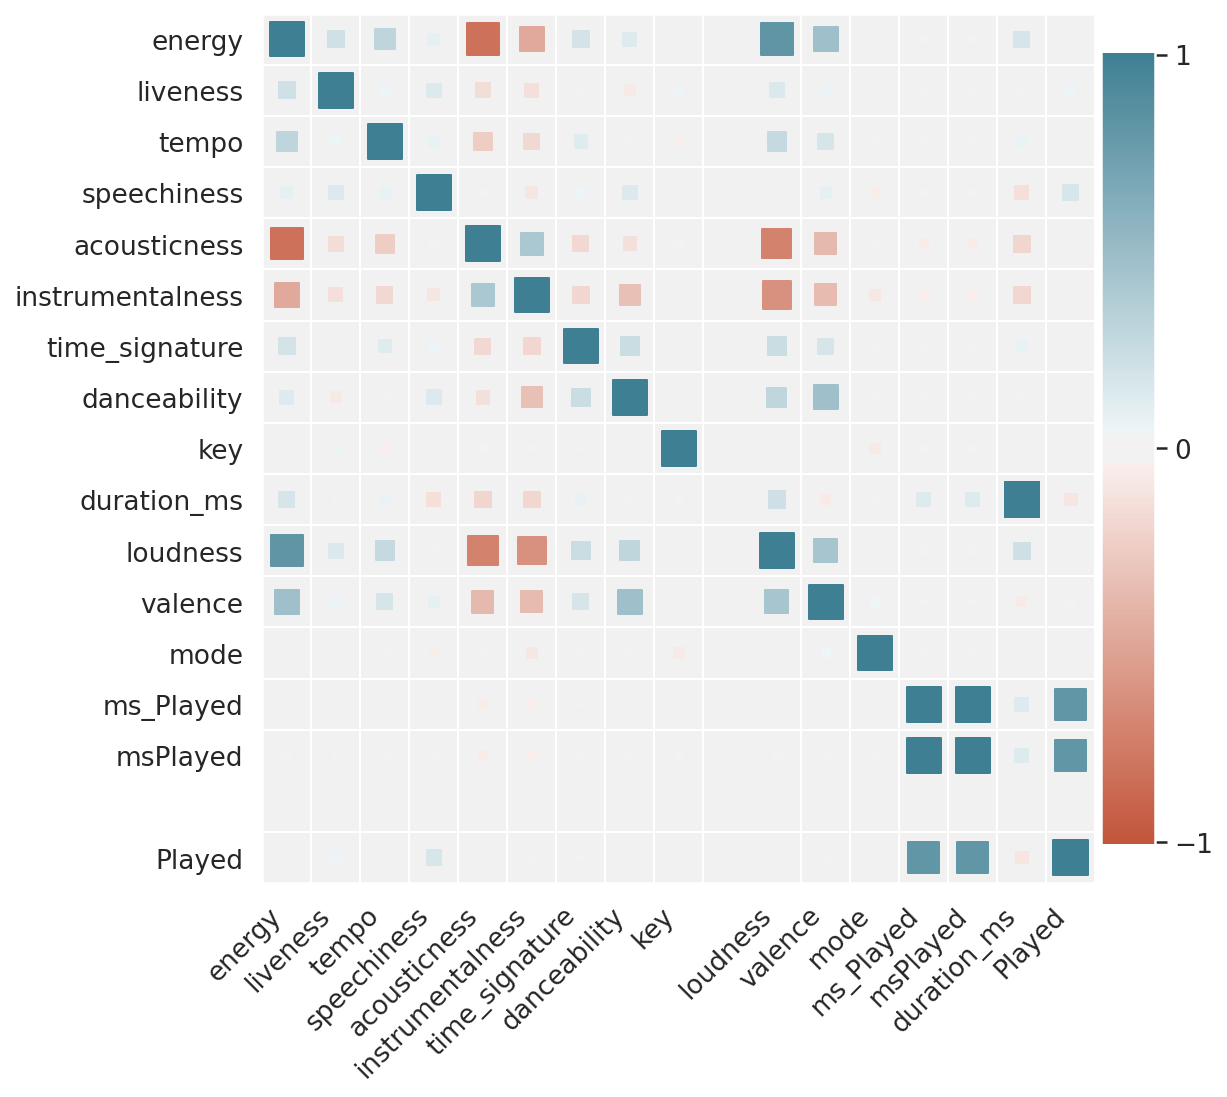

In [ ]:
plt.figure(figsize=(8, 8))
corrplot(topaf.corr(), size_scale=300);

In [ ]:
topaf.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,ms_Played,msPlayed,duration_ms,Played
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1.845000e+03,1.845000e+03,1845.000000,1845.000000
mean,0.586974,0.180031,120.126585,0.069451,0.338606,0.234488,3.884553,0.515752,5.231978,199408.968564,-9.439981,0.428092,0.654201,9.710711e+05,9.710711e+05,199408.968564,4.902981
std,0.286843,0.148730,31.756079,0.076197,0.369281,0.371408,0.496413,0.174757,3.580551,64915.195862,6.415964,0.244234,0.475757,1.996405e+06,1.996405e+06,64915.195862,13.284016
min,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4053.000000,-41.808000,0.000000,0.000000,1.605100e+04,1.605100e+04,4053.000000,1.000000
25%,0.371000,0.094700,96.007000,0.035300,0.008940,0.000000,4.000000,0.402000,2.000000,163726.000000,-11.615000,0.238000,0.000000,2.349860e+05,2.349860e+05,163726.000000,1.000000
50%,0.630000,0.119000,119.865000,0.046300,0.153000,0.000383,4.000000,0.527000,5.000000,198707.000000,-7.392000,0.402000,1.000000,3.148970e+05,3.148970e+05,198707.000000,1.000000
75%,0.844000,0.213000,140.096000,0.069800,0.707000,0.537000,4.000000,0.644000,8.000000,229493.000000,-5.091000,0.609000,1.000000,7.035120e+05,7.035120e+05,229493.000000,3.000000
max,0.999000,0.984000,209.979000,0.966000,0.996000,1.000000,5.000000,0.965000,11.000000,790227.000000,1.006000,0.978000,1.000000,3.246957e+07,3.246957e+07,790227.000000,232.000000


In [ ]:
top10_tracks = topaf.sort_values(by='Played', ascending=False).head(10)

In [ ]:
top10_tracks.describe()
top10_tracks.drop(columns=['msPlayed'], inplace=True)

In [ ]:
top10df = top10_tracks.drop(columns=['key', 'mode', 'ms_Played','Played','time_signature','Artist','Track','TrackId'])
top10df.head()

In [ ]:
audiof= topaf.drop(columns=['key', 'mode','Played','ms_Played','time_signature','Artist','Track','TrackId'])
audiof.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

top10df[['tempo', 'duration_ms', 'loudness']] = scaler.fit_transform(top10df[['tempo', 'duration_ms', 'loudness']]) 

In [ ]:
pd.options.mode.chained_assignment = None
audiof[['tempo', 'duration_ms', 'loudness']] = scaler.fit_transform(audiof[['tempo', 'duration_ms', 'loudness']]) 

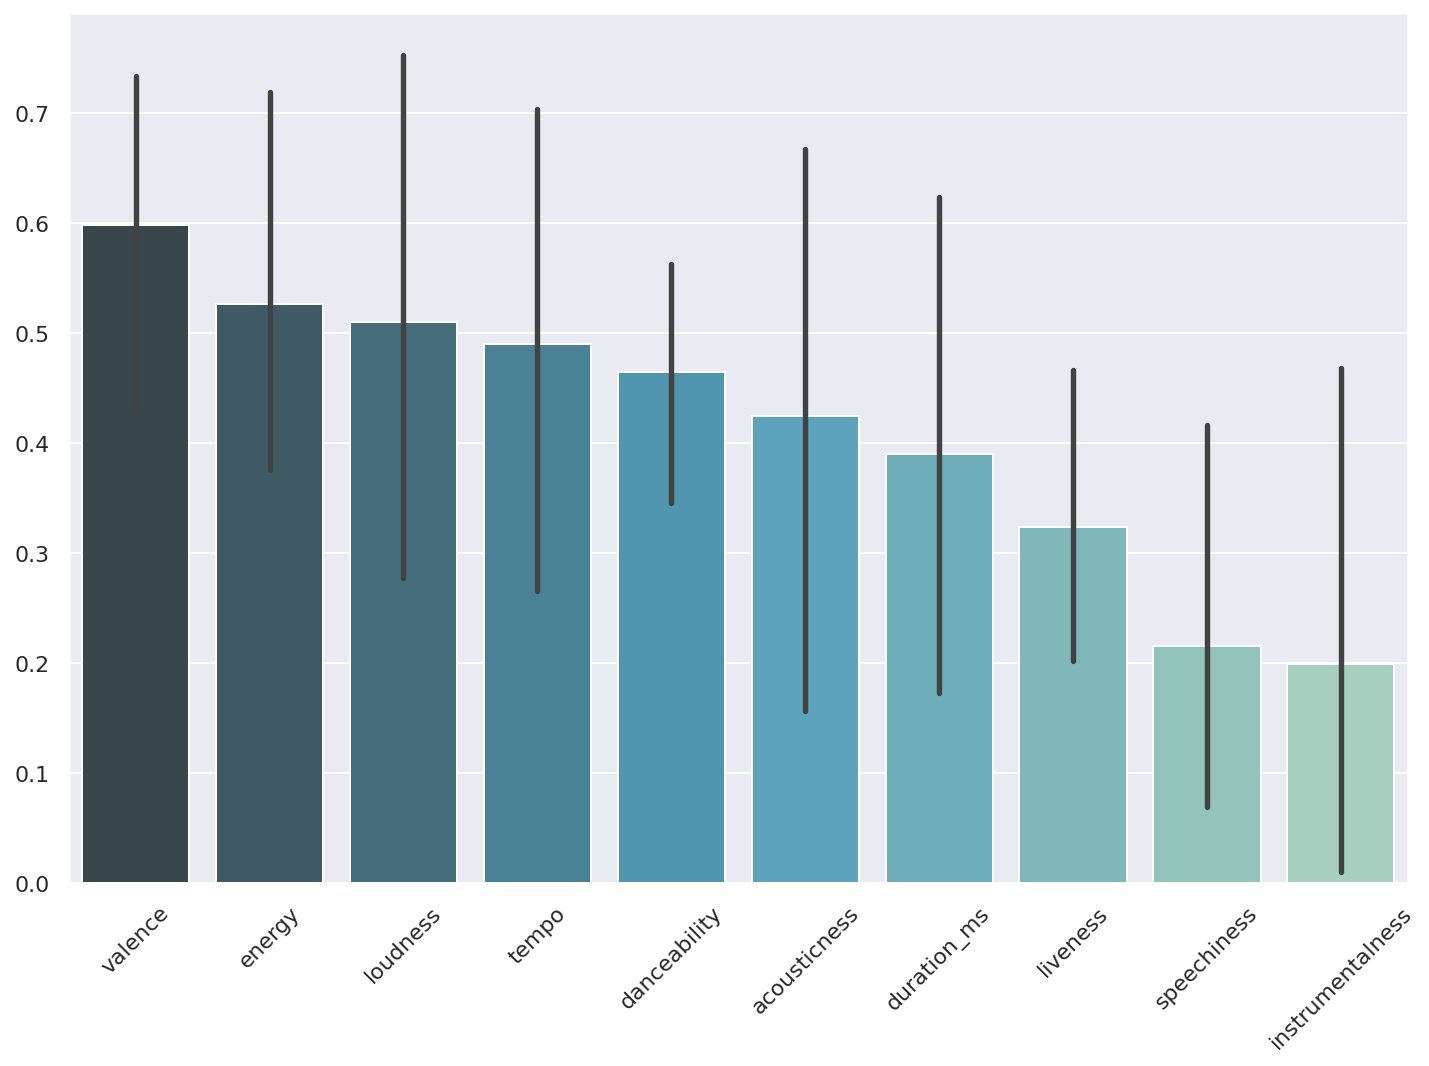

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top10df,palette='GnBu_d',order=top10df.mean().sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

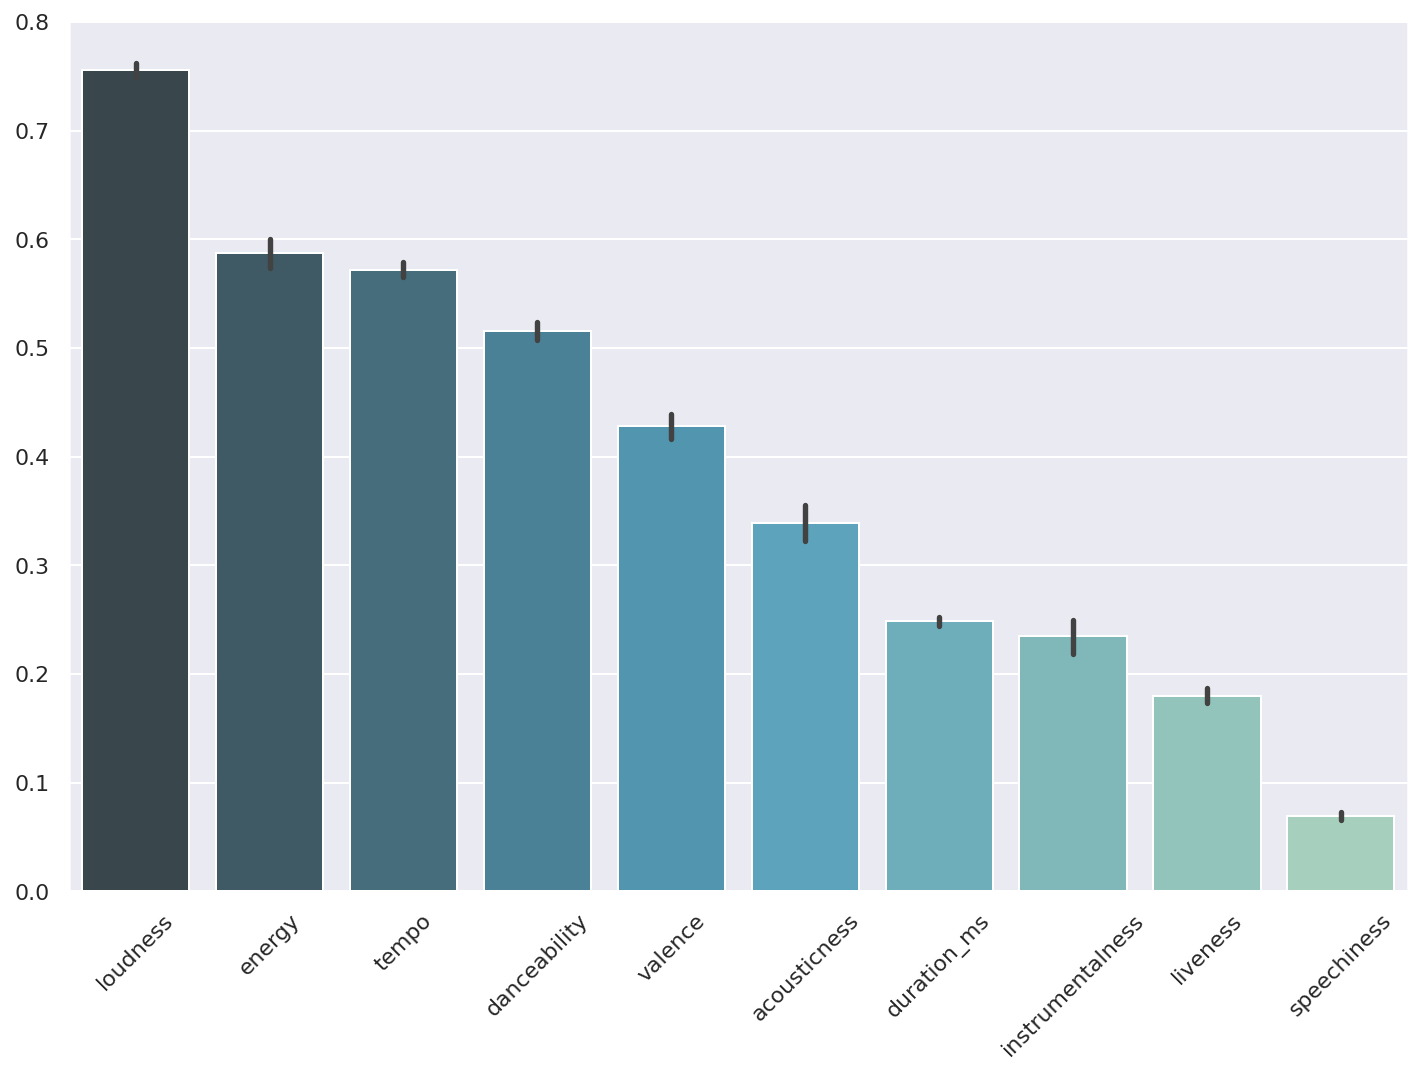

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=audiof,palette='GnBu_d', order=audiof.mean().sort_values(ascending=False).index )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
audiof.describe()

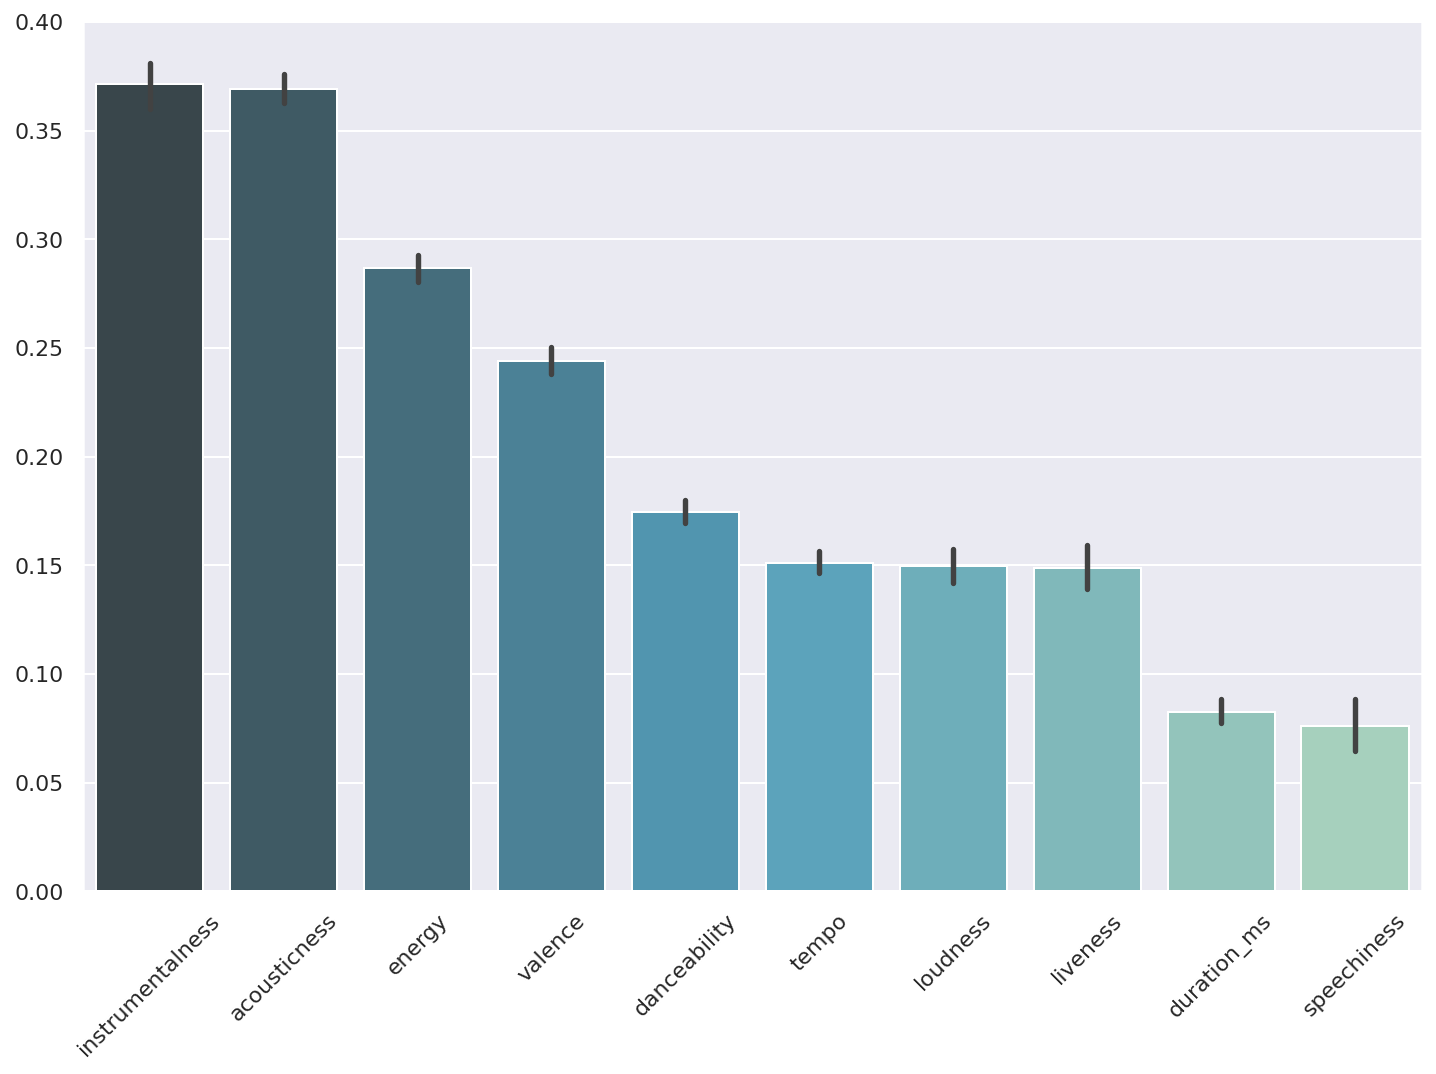

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=audiof,palette='GnBu_d', estimator = np.std, order=audiof.std().sort_values(ascending=False).index )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

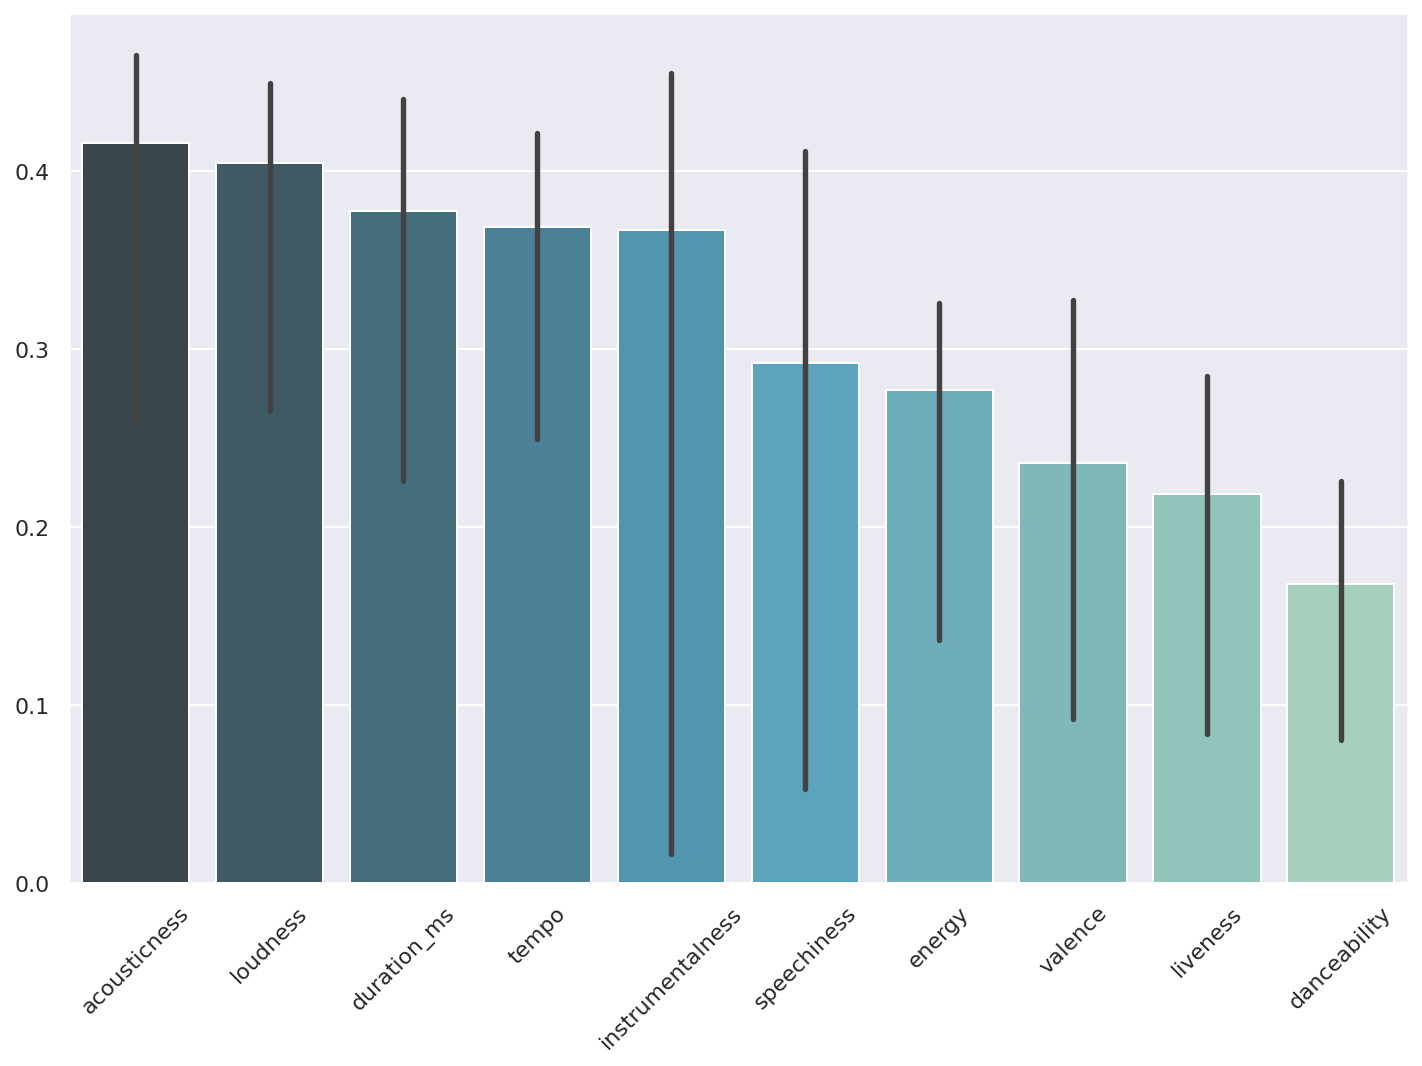

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top10df,palette='GnBu_d', estimator = np.std, order=top10df.std().sort_values(ascending=False).index )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
!pip install discogs_client

In [ ]:
import discogs_client
from discogs_client.exceptions import HTTPError

In [ ]:
consumer_key = 'xElnriqeqPUPHfGxesRz'
consumer_secret = 'KONPZeSkBGruzHpsUPMVSamoInYUzZCd'

user_agent = 'blazespotifygenrefinder/1.0 '

discogsclient = discogs_client.Client(user_agent)

discogsclient.set_consumer_key(consumer_key, consumer_secret)
token, secret, url = discogsclient.get_authorize_url()
print(token)

print('Please browse to the following URL {0}'.format(url))

accepted = 'n'
while accepted.lower() == 'n':
    accepted = input('Have you authorized me at {0} [y/n] :'.format(url))
oauth_verifier = input('Verification code :')
try:
    access_token, access_secret = discogsclient.get_access_token(oauth_verifier)
except HTTPError:
    print('Unable to authenticate.')
user = discogsclient.identity()

In [ ]:
search_results = discogsclient.search('House For All', type='release',
        artist='Blunted Dummies')
print(search_results[0].title)


Blunted Dummies - House For All


In [ ]:
top10_tracks.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,Artist,Track,TrackId,ms_Played,Played
3151,0.911,0.2780,160.152,0.0851,0.0124,0.000000,4,0.443,9,90375,-4.208,0.680,0,Michael Jackson,Billie Jean,5ChkMS8OtdzJeqyybCc9R5,20995821.0,232
3389,0.335,0.3420,161.680,0.9660,0.9930,0.000000,4,0.636,11,35240,-13.327,0.561,1,Nirvana,Smells Like Teen Spirit - Live At The Paramoun...,50bA0cAFEo3Ep99yj0x2th,7382997.0,209
2506,0.206,0.3140,81.877,0.5510,0.6640,0.000000,3,0.658,1,57040,-18.454,0.591,1,KANA-BOON,Silhouette,21z1GxeHjfD3qkaF5CgCTO,10439828.0,183
5211,0.553,0.0536,85.026,0.2410,0.1150,0.095900,4,0.692,2,210111,-4.809,0.550,1,Vance Joy,Saturday Sun,2RiBogNRfulkNf7fVbPOrJ,32469573.0,154
1361,0.408,0.7910,73.133,0.0717,0.9740,0.000418,3,0.458,11,34600,-16.553,0.832,1,Emilio Lanza,Australia,1S7hP7sWNFgrpNTryb7C69,4434623.0,128


In [ ]:
for i in range(10):
  search_results = discogsclient.search(track=track_top10[i], type='release', artist=artist_top10[i])
  res = search_results[0].results[0]['style']
  print(res)
  print(res['style'])
  genre = res.genre
  style = res.style
  print(track_top10[i], genre, style)

AttributeError: ignored

In [ ]:
artist_top10 = top10_tracks['Artist'].tolist()
track_top10 = top10_tracks['Track'].tolist()
print(artist_top10)
print(track_top10)

['Michael Jackson', 'Nirvana', 'KANA-BOON', 'Vance Joy', 'Emilio Lanza', 'QUEEN BEE', 'Green Day', 'The 1975', 'Green Day', 'Daichi Miura']
['Billie Jean', 'Smells Like Teen Spirit - Live At The Paramount/1991', 'Silhouette', 'Saturday Sun', 'Australia', 'Fire', '21 Guns', 'Chocolate', 'Jesus of Suburbia', 'Blizzard']


In [ ]:
res = discogsclient.search(track='Billie Jean', type='release',
        artist='Michael Jackson')

In [ ]:
print(res.page(1)[0])

<Release 4553588 'Sharp Presents Michael Jackson - Billie Jean'>


In [ ]:
!pip install oauth2

In [ ]:
import json
import sys
import urllib
from urllib.parse import urlparse
import oauth2 as oauth

In [ ]:
consumer = oauth.Consumer(consumer_key, consumer_secret)
client = oauth.Client(consumer)

In [ ]:
token = oauth.Token(key=access_token['oauth_token'],
        secret=access_token['oauth_token_secret'])
client = oauth.Client(consumer, token)


TypeError: ignored